In [2]:
# Author: Banafsheh Khazali, Emmett Collings
# Date: Oct 2, 2022

In [3]:
import networkx as nx # make sure you installed networkx
import numpy as np
import pandas as pd

In [16]:
# Data representation
df = pd.read_csv("Lines.csv")
df
df.head()

,Unnamed: 0,lineId,season,name_x,team,position,situation,games_played,icetime,iceTimeRank,...,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst,playerId1,playerId2,playerId,name_y,playername3,playername1,playername2,player names
0,0,846869584751518475770,2012,Etem-Lombardi-Palmieri,ANA,line,5on5,2,96.0,38.0,...,0.06,0.06,8468695,8475151,8475770,Emerson Etem,Emerson Etem,Matthew Lombardi,Kyle Palmieri,Matthew Lombardi-Kyle Palmieri-Emerson Etem
1,1,846792584716788474201,2012,Labrie-Hall-Pouliot,T.B,line,5on5,1,67.0,15.0,...,0.07,0.07,8467925,8471678,8474201,Pierre-Cedric Labrie,Pierre-Cedric Labrie,Adam Hall,Benoit Pouliot,Adam Hall-Benoit Pouliot-Pierre-Cedric Labrie
2,2,0,0,0,0,0,0,0,0.0,0.0,...,0.00,0.00,0,0,0,NaN,NaN,Matt Hunwick,Ryan Wilson,Matt Hunwick-Ryan Wilson-nan
3,3,847092084736468474681,2012,Carter-Loktionov-Clarkson,N.J,line,5on5,2,57.0,26.0,...,0.00,0.00,8470920,8473646,8474681,Andrei Loktionov,Andrei Loktionov,David Clarkson,Ryan Carter,David Clarkson-Ryan Carter-Andrei Loktionov
4,4,847457384746668475231,2012,Ullstrom-Cizikas-Bailey,NYI,line,5on5,1,22.0,10.0,...,0.00,0.00,8474573,8474666,8475231,Casey Cizikas,Casey Cizikas,Josh Bailey,David Ullstrom,Josh Bailey-David Ullstrom-Casey Cizikas


In [17]:
df.dropna()

,Unnamed: 0,lineId,season,name_x,team,position,situation,games_played,icetime,iceTimeRank,...,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst,playerId1,playerId2,playerId,name_y,playername3,playername1,playername2,player names
0,0,846869584751518475770,2012,Etem-Lombardi-Palmieri,ANA,line,5on5,2,96.0,38.0,...,0.06,0.06,8468695,8475151,8475770,Emerson Etem,Emerson Etem,Matthew Lombardi,Kyle Palmieri,Matthew Lombardi-Kyle Palmieri-Emerson Etem
1,1,846792584716788474201,2012,Labrie-Hall-Pouliot,T.B,line,5on5,1,67.0,15.0,...,0.07,0.07,8467925,8471678,8474201,Pierre-Cedric Labrie,Pierre-Cedric Labrie,Adam Hall,Benoit Pouliot,Adam Hall-Benoit Pouliot-Pierre-Cedric Labrie
3,3,847092084736468474681,2012,Carter-Loktionov-Clarkson,N.J,line,5on5,2,57.0,26.0,...,0.00,0.00,8470920,8473646,8474681,Andrei Loktionov,Andrei Loktionov,David Clarkson,Ryan Carter,David Clarkson-Ryan Carter-Andrei Loktionov
4,4,847457384746668475231,2012,Ullstrom-Cizikas-Bailey,NYI,line,5on5,1,22.0,10.0,...,0.00,0.00,8474573,8474666,8475231,Casey Cizikas,Casey Cizikas,Josh Bailey,David Ullstrom,Josh Bailey-David Ullstrom-Casey Cizikas
5,5,846614084695818475169,2012,Kane-Jokinen-Wellwood,WPG,line,5on5,26,5008.0,247.0,...,3.47,3.44,8466140,8469581,8475169,Evander Kane,Evander Kane,Olli Jokinen,Kyle Wellwood,Olli Jokinen-Kyle Wellwood-Evander Kane
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94017,94017,847488484758488479514,2021,Hoffman-Pitlick-Gallagher,MTL,line,5on5,5,851.0,50.0,...,0.56,0.55,8474884,8475848,8479514,Rem Pitlick,Rem Pitlick,Mike Hoffman,Brendan Gallagher,Mike Hoffman-Brendan Gallagher-Rem Pitlick
94019,94019,847638984800398480829,2021,Kotkaniemi-Trocheck-Necas,CAR,line,5on5,10,2890.0,54.0,...,2.08,2.06,8476389,8480039,8480829,Jesperi Kotkaniemi,Jesperi Kotkaniemi,Vincent Trocheck,Martin Necas,Vincent Trocheck-Martin Necas-Jesperi Kotkaniemi
94020,94020,847757384780578479366,2021,Walker-Brown-Joshua,STL,line,5on5,7,2316.0,50.0,...,0.88,0.87,8477573,8478057,8479366,Logan Brown,Logan Brown,Nathan Walker,Dakota Joshua,Nathan Walker-Dakota Joshua-Logan Brown
94021,94021,847517084768978477573,2021,Walker-Schenn-Sundqvist,STL,line,5on5,3,1518.0,9.0,...,0.90,0.90,8475170,8476897,8477573,Nathan Walker,Nathan Walker,Brayden Schenn,Oskar Sundqvist,Brayden Schenn-Oskar Sundqvist-Nathan Walker


In [57]:
# Create a network of nodes which are players and the links are players that played together
df1 = df[['playername1' , 'playername2', 'playername3']]
G = nx.Graph()
G = nx.from_pandas_edgelist(df1, 'playername1', 'playername2', 'playername3')


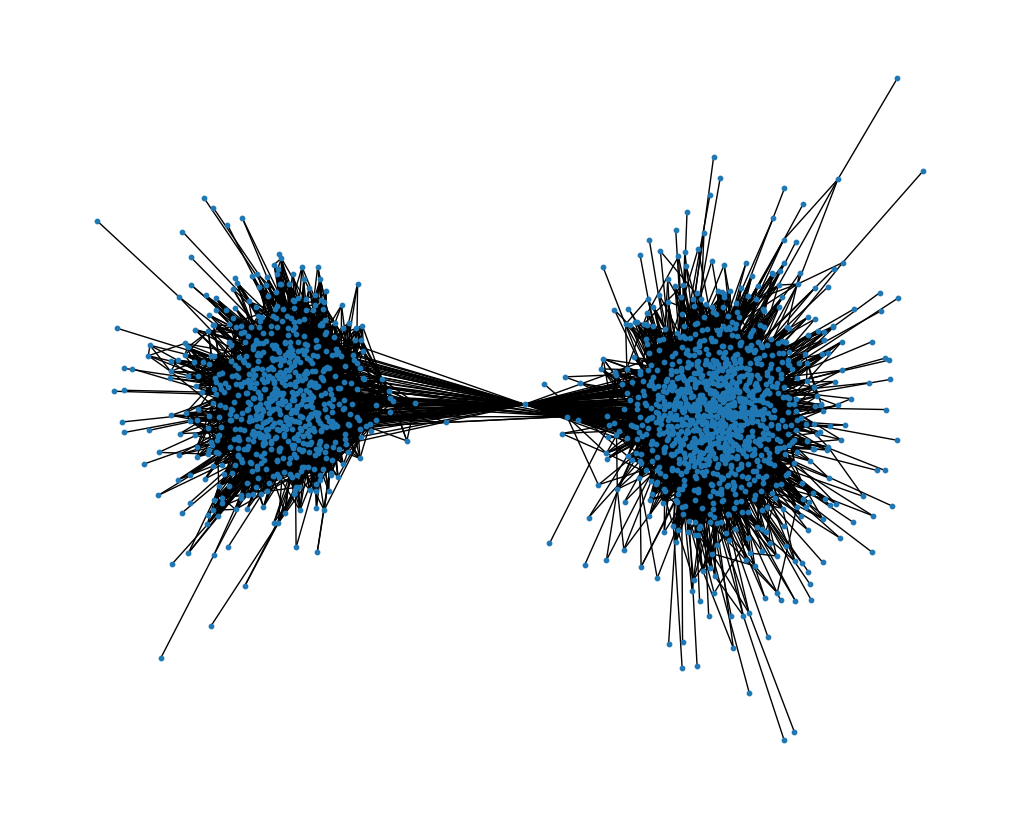

In [42]:
# Plot the network
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
nx.draw_spring(G, node_size=10)

In [52]:
G.add_edges_from([('playername3', 'playername2')])

In [53]:
# number of edges
G.number_of_edges()


25469

In [54]:
# number of nodes
G.number_of_nodes()

1886

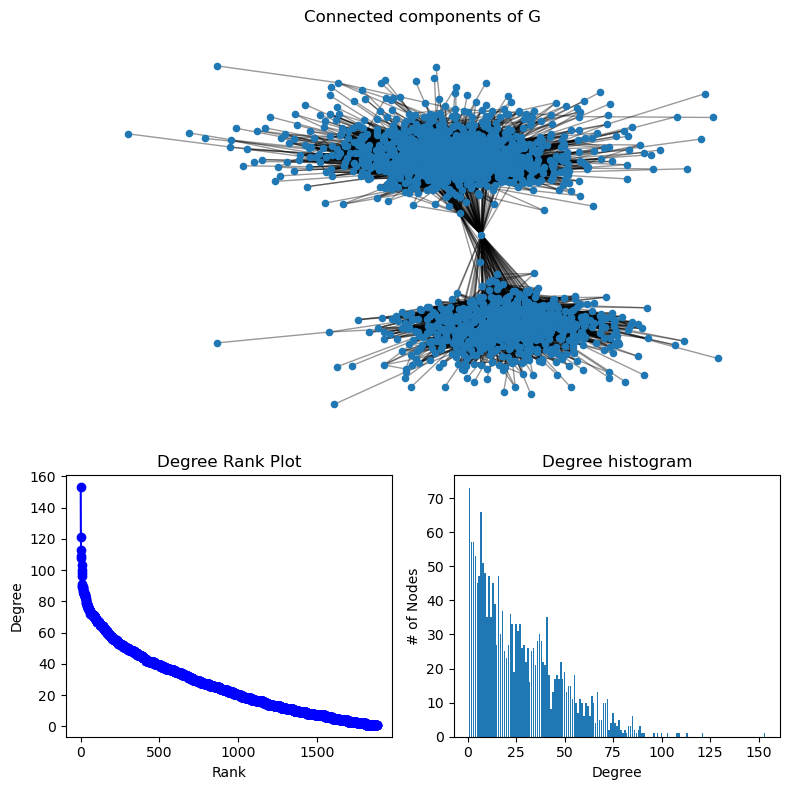

In [25]:
import matplotlib.pyplot as plt
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [26]:
#basic analysis
N = len(G)
L = G.size()
degrees = [G.degree(node) for node in G]
kmin = min(degrees)
kmax = max(degrees)

In [27]:
print("Number of nodes: ", N)
print("Number of edges: ", L)
print()
print("Average degree: ", 2*L/N)
print("Average degree (alternate calculation)", np.mean(degrees))
print()
print("Minimum degree: ", kmin)
print("Maximum degree: ", kmax)

Number of nodes:  1884
Number of edges:  25468

Average degree:  27.036093418259025
Average degree (alternate calculation) 27.036093418259025

Minimum degree:  1
Maximum degree:  153


In [28]:
# Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

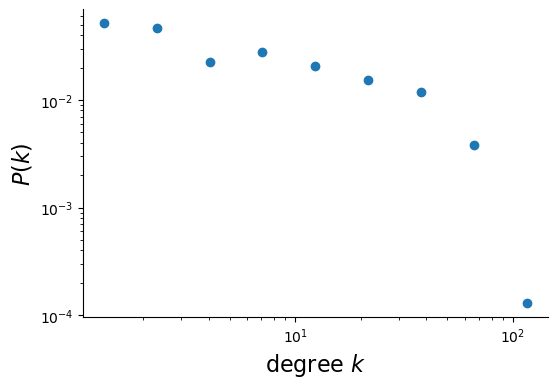

In [29]:
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

In [30]:
# Get 20 logarithmically spaced bins between kmin and kmax
bin_edges = np.linspace(kmin, 10, num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

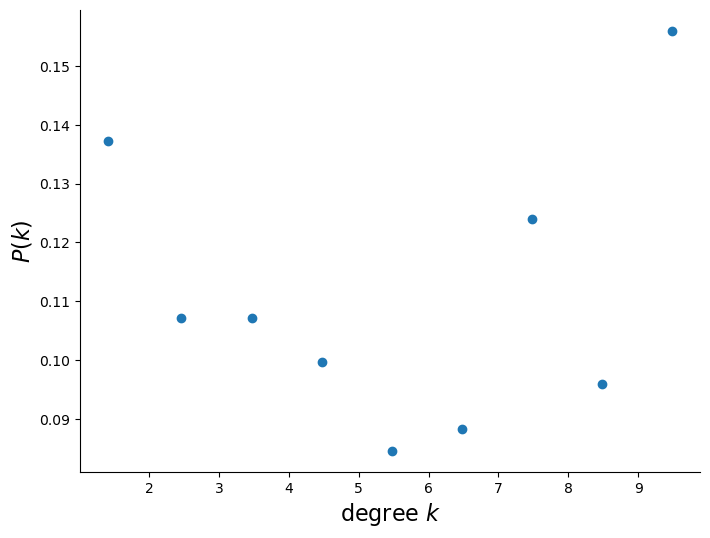

In [31]:
fig = plt.figure(figsize=(8,6))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

In [32]:
print(nx.info(G))

Graph with 1884 nodes and 25468 edges


/var/folders/1l/qw83q2k515n_b2b4pjrqlpbr0000gq/T/ipykernel_2981/2606185536.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


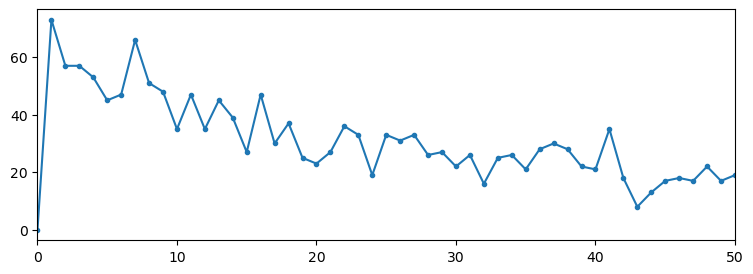

In [33]:
hist = nx.degree_histogram(G)
plt.figure(figsize=(9,3))
plt.plot(hist, marker = '.')
plt.xlim((0,50))
plt.show()

In [34]:
def all_networks(g, start, end):
    def plotpath(g, path):
        h = nx.subgraph(g, path)               
        nx.draw(h, pos = pos, node_color = 'r', edge_color = 'r', 
                node_size = 100, aplha = 0.7, width = 2)
             
    paths = nx.all_shortest_paths(g, source = start, target = end)
    paths = [i for i in paths]
    h = nx.subgraph(g, sum([i for i in paths], []))    
    labels = nx.get_node_attributes(h, 'label')   
    i = nx.subgraph(g, sum([nx.neighbors(g, i) for i in h.nodes()], []))  
    pos = nx.fruchterman_reingold_layout(i)
    
    plt.figure(figsize=(9,6))
    nx.draw(i, pos = pos, node_color = 'b', edge_color = 'b', node_size = 50, alpha = 0.5)
    [plotpath(g, i) for i in paths]
    nx.draw_networkx_labels(i, pos = pos, labels = labels, font_size = 10)
    plt.show()

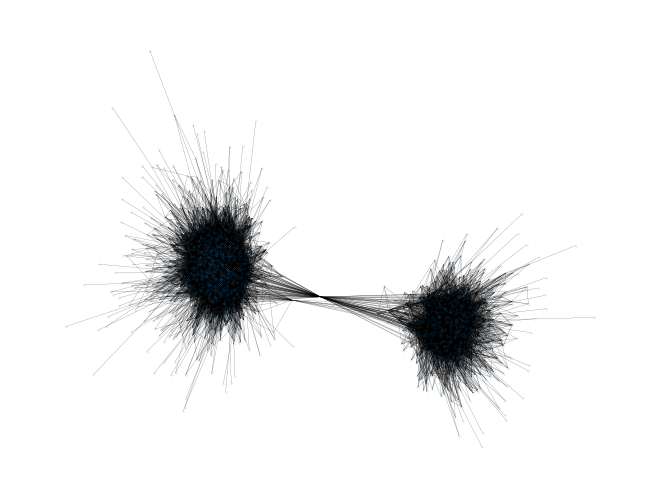

In [35]:
nx.draw(G, pos=nx.spring_layout(G), node_size=0.01, width=0.1)


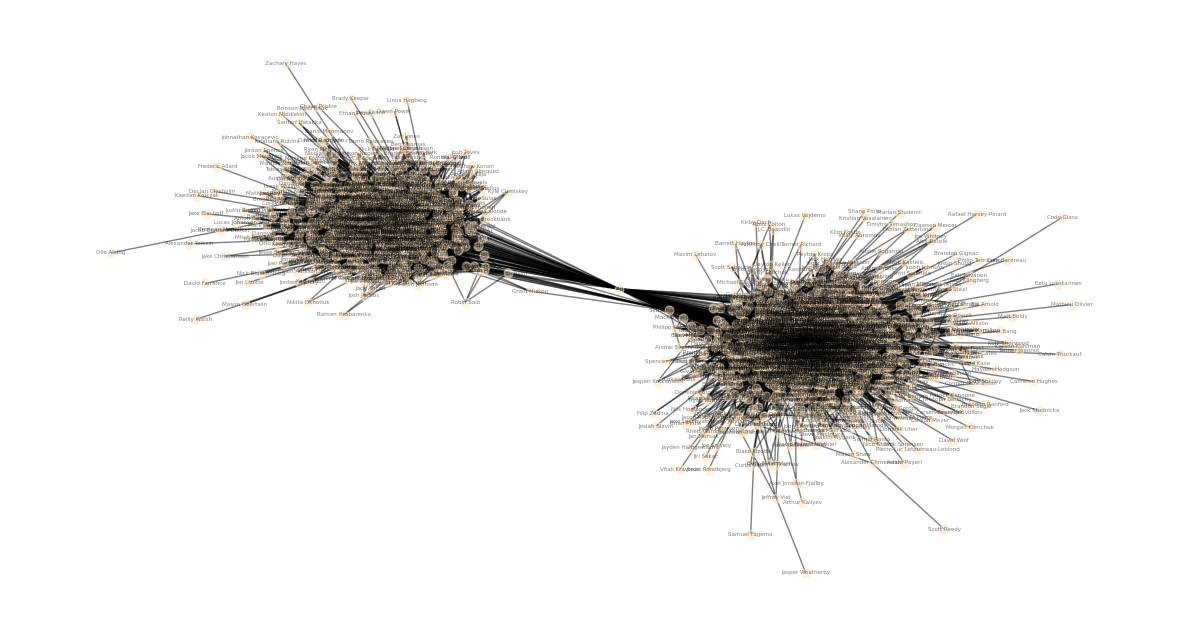

In [36]:
fig, ax = plt.subplots(figsize=(15, 8))

nx.draw_spring(G, node_color='bisque', with_labels=True , node_size = 40 , font_size = 4 , alpha = 0.5)